In [1]:
## Ejercicio 1: Prepare el ambiente de trabajo




In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns

In [3]:
df=pd.read_csv('Credit.csv')

In [30]:

df.describe()

,Income,Limit,Rating,Cards,Age,Education,Balance,AfricanAmerican,Asian
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.0000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000,0.2475,0.255000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877,0.4321,0.436407
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.0000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000,0.0000,0.000000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000,0.0000,0.000000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000,0.0000,1.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000,1.0000,1.000000


In [5]:
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
df['AfricanAmerican'] = np.where(df['Ethnicity'] == 'African American', 1, 0)

In [8]:
df['Asian'] = np.where(df['Ethnicity'] == 'Asian', 1, 0)

In [10]:
#Variables categóricas
variables_categoricas = ['Gender', 'Student', 'Married', 'Ethnicity']

for cat in variables_categoricas:
    print("\n",cat)
    # frecuencia relativa de cada categoría dentro de la variable
    print(df[cat].value_counts())
    #porcentaje de la frecuencia relativa
    print((df[cat].value_counts()/len(df[cat])))


 Gender
Female    207
 Male     193
Name: Gender, dtype: int64
Female    0.5175
 Male     0.4825
Name: Gender, dtype: float64

 Student
No     360
Yes     40
Name: Student, dtype: int64
No     0.9
Yes    0.1
Name: Student, dtype: float64

 Married
Yes    245
No     155
Name: Married, dtype: int64
Yes    0.6125
No     0.3875
Name: Married, dtype: float64

 Ethnicity
Caucasian           199
Asian               102
African American     99
Name: Ethnicity, dtype: int64
Caucasian           0.4975
Asian               0.2550
African American    0.2475
Name: Ethnicity, dtype: float64


In [11]:
#-----------------------------------------------------------
## Ejercicio 2: Genere gráficos descriptivos para las variables contínuas

In [23]:
def plot_hist(variable):
    #obtener la media
    variable_mean = variable.mean()
    variable_median = variable.median()
    plt.hist(variable, color='grey', alpha=.4)
    plt.axvline(variable_mean, color='dodgerblue', linestyle='--', lw=2)
    plt.axvline(variable_median, color='tomato', linestyle='--', lw=2)
   # plt.title('Histograma de la variable ', variable )

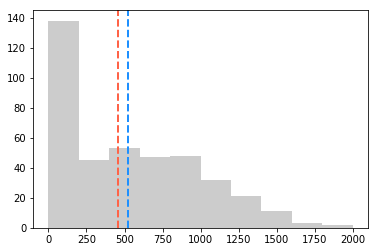

In [24]:
plot_hist(df['Balance'])

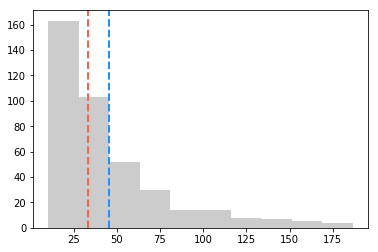

In [25]:
plot_hist(df['Income']) 
#Existe una mayor concentración de bajos ingresos.

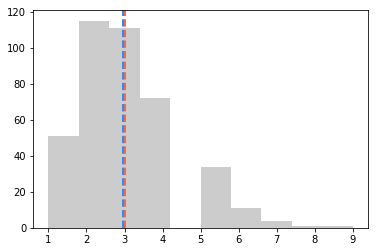

In [27]:
plot_hist(df['Cards'])

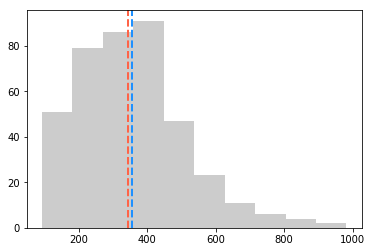

In [28]:
plot_hist(df['Rating'])

In [31]:
## Ejercicio 3: Regresión Lineal Simple

In [32]:
##¿Qué variable presenta un mayor poder explicativo de la variabilidad de `Balance`?
# Donde exista mayor correlación

In [46]:
print('corr1: ', df['Income'].corr(df['Balance']))
print('corr2: ', df['Limit'].corr(df['Balance']))
print('corr3: ', df['Rating'].corr(df['Balance']))
print('corr4: ', df['Cards'].corr(df['Balance']))
print('corr5: ', df['Age'].corr(df['Balance']))
print('corr6: ', df['Education'].corr(df['Balance']))

corr1:  0.46365645701575736
corr2:  0.8616972670153951
corr3:  0.863625160621495
corr4:  0.08645634741861911
corr5:  0.0018351188590736563
corr6:  -0.00806157645355343


In [47]:
#El nivel de endeudamiento de la tarjeta de crédito tiene relación con el cupo de la tarjeta (límite) 
#y el rating.

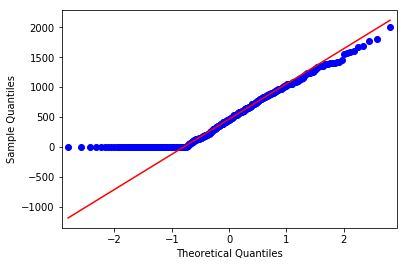

In [48]:
#Veamos si el límite y Balance tienen tendencia similar
sm.qqplot(df['Balance'],line='q');

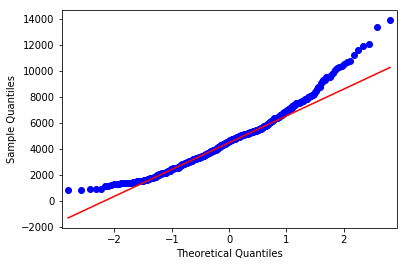

In [49]:
sm.qqplot(df['Limit'],line='q');

In [53]:
#El efecto que tiene ser estudiante en el nivel de endeudamiento tarjeta de crédito
print((df['Student'].value_counts()/len(df['Student'])))

No     0.9
Yes    0.1
Name: Student, dtype: float64


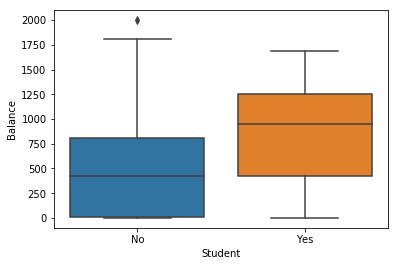

In [57]:
sns.boxplot(x=df['Student'], y=df['Balance'])

In [58]:
#Tienen mayor promedio de deuda los estudiantes

In [59]:
df.loc[df['Student'] == 0 ]['Balance'].quantile(.75)-df.loc[df['Student'] == 0]['Balance'].quantile(.25)

nan

In [60]:
#no existe , se rechaza la hipotesis

In [61]:
#----------------------------------------------------------------
## Ejercicio 4: Genere un modelo que incluya todos los regresores

In [62]:
model2 = smf.ols('Balance ~ Income + Limit + Rating + Cards + Age + Education + AfricanAmerican + Asian', data=df)
model2 = model2.fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     354.4
Date:                Sat, 15 Sep 2018   Prob (F-statistic):          5.89e-174
Time:                        10:57:47   Log-Likelihood:                -2597.3
No. Observations:                 400   AIC:                             5213.
Df Residuals:                     391   BIC:                             5249.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -486.4762     55.686     -8.736      0.000    -595.957    -376.996
Income             -7.5713      0.383    -19.783      0.000      -8.324      -6.819
Limit               0.1220      0.053      2.296      0.022       0.018       0.226
Rating              2.1250      0.796      2.670      0.008       0.560       3.690
Cards              11.2069      7.075      1.584      0.114      -2.703      25.116
Age                -0.8514      0.479     -1.776      0.077      -1.794       0.091
Education           1.9185      2.602      0.737      0.461      -3.198       7.035
AfricanAmerican    -3.0407     19.921     -0.153      0.879     -42.206      36.125
Asian              23.6123     19.762      1.195      0.233     -15.242      62.466
==============================================================================
Omnibus:                       95.456   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              167.246
Skew:                           1.387   Prob(JB):                     4.82e-37
Kurtosis:                       4.530   Cond. No.                     3.65e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""